In [ ]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.stats import sem 
from scipy.stats import linregress 
from sklearn import datasets

In [ ]:
# download and cread df by data file 1 named below 
mouse_metadata_df =pd.read_csv("data/Mouse_metadata.csv")
mouse_metadata_df.head(2)

In [ ]:
# no duplicates int this data when start
check_dupl_mouse_df =mouse_metadata_df[mouse_metadata_df.duplicated(["Mouse ID"])]
print(check_dupl_mouse_df)

In [ ]:
# # download and cread df by data file 2 named below 
study_results_df = pd.read_csv("data/Study_results.csv")
study_results_df.head(2)

In [ ]:
# checking how many unique mouse studies by checking mouse study data 
mouse_id_count =len(study_results_df["Mouse ID"].unique()) 
# when i use .unique() I can get the series of mouseID's and
# get length of it will tell me how many unique mouse there are
mouse_id_count
# check the number of mice

In [ ]:
# Combine mouse data and stduy meta data od mouse into a single dataset
# Start working and getting statistics from this df
combined_df = pd.merge(study_results_df, mouse_metadata_df, how = "outer", on = "Mouse ID")
combined_df.head(2)

In [ ]:
# Find any duplicate rows with the same Mouse ID's and Timepoints from 
    # We suppose to haev 248 mouse, therefore need to check the data for any mouse ID 
    # with duplicate time points and 
    # remove any data associated with that mouse ID.
dupl_mouse_df =combined_df[combined_df.duplicated(["Mouse ID","Timepoint"], keep=False)]
dupl_mouse_df.head(2)

In [ ]:
# since time point is only in the study table i just work with study table
# keeping all records except rows that located by using loc func for 
# specific mouse id "g989"
cleaned_combined_df = combined_df.loc[combined_df["Mouse ID"] != "g989"]
cleaned_combined_df.head(2)

In [ ]:
# Recheck the number of mice
mouse_id_count_nondupl =len(cleaned_combined_df["Mouse ID"].unique())
# by doing this I will the list/dataseries of unique mouse id, and
# length of it will give me the how many unique mouse it the study
mouse_id_count_nondupl 

In [ ]:
# Start working and getting statistics from this df
cleaned_combined_df = cleaned_combined_df.fillna(0)
cleaned_combined_df.head(2)

In [ ]:
cleaned_combined_df.isnull().any().any()

## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each drug regimen.
mean = cleaned_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
#  median, variance,standard deviation, and SEM of the tumor volume for each regimen
median = cleaned_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
#variance,standard deviation, and SEM of the tumor volume for each regimen
variance = cleaned_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_div = cleaned_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
#SEM of the tumor volume for each regimen
sem_err = cleaned_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


In [ ]:
# single line using agg func get the summary statistics table 
summ_stat_df = cleaned_combined_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median","var","std","sem"]})
summ_stat_df

In [ ]:
# counted_by_drug_reg_df= cleaned_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].count()
# counted_by_drug_reg_df

In [ ]:
#print(f"categories of drugs : {len(counted_by_drug_reg_df)}")

In [ ]:
# grouped_study_df = study_results_df.groupby(["Mouse ID","Timepoint",'Tumor Volume (mm3)'])
# mouse_at_timepoints_vol= grouped_study_df.nunique()
# mouse_at_timepoints_vol.head(50)

In [ ]:
## Bar and Pie Charts

In [ ]:
grouped_df_to_extract= cleaned_combined_df[["Drug Regimen", "Mouse ID"]].groupby("Drug Regimen")
grouped_df_to_extract

In [ ]:
num_mice_df = pd.DataFrame(grouped_df_to_extract["Mouse ID"].count())


In [ ]:
num_mice_used_each_drug=num_mice_df.sort_values("Mouse ID", ascending = False)
num_mice_used_each_drug

In [ ]:
# by pandas
# Generate a bar plot showing the total number of mouse tested 
# for each drug regimen.
# There should be a single bar per regimen
bar_chart = num_mice_used_each_drug.plot(kind="bar", figsize=(8,4))
#Set a title for the chart
bar_chart.set_ylabel("Number of mice tested per drug regimen")
bar_chart.set_title("Number of mouses used for each drug regimen throughout study")
#Display chart
plt.show()
plt.tight_layout() # to fit better

In [ ]:
drug_reg =  num_mice_df.index.tolist()

In [ ]:
drug_reg

In [ ]:
mouse_count = num_mice_used_each_drug["Mouse ID"].tolist()
mouse_count

In [ ]:
x_axis = np.arange(len(drug_reg))

In [ ]:
tick_loc = [value  for value in x_axis]

In [ ]:
# plotting by pyplot
plt.figure(figsize=(7,5))
plt.bar(x_axis, mouse_count, color="steelblue", alpha=0.9, align="center")
plt.xticks(tick_loc, drug_reg, rotation="vertical") # drug regime is name for bar 

plt.xlabel("Drug regimens")
plt.ylabel("Number of mice Tested")
plt.title("Number of mouses used for each drug regimen throughout study")
plt.xlim(-0.75, 10)
plt.ylim(0, 250)
plt.tight_layout()
plt.show()

In [ ]:
# grouped by gender 
gender_group = cleaned_combined_df[["Mouse ID","Sex"]].groupby("Sex")
gender_group

In [ ]:
gender_group_count = gender_group["Mouse ID"].count()
gender_group_count

In [ ]:
# by panda 
fig2, ax2 = plt.subplots(figsize=(4, 4))
gender_df = gender_group["Sex"].value_counts()
gender_df.plot(kind = "pie",autopct='%1.2f%%',
            title = "Gender Distribution of Female vs Male Mice", 
               fontsize = 10, startangle=80)

plt.axis("equal")
plt.show()
gender_df

In [ ]:
#by pyplot
fig3, ax3 = plt.subplots(figsize =(4,4))
labels = gender_group["Sex"].unique()
plt.pie(gender_df,autopct='%1.2f%%', 
        labels=labels,
        colors = ("steelblue","orange"),
        textprops={'fontsize': 10}, startangle=80)
plt.title("Gender Distribution of Female vs Male Mice")
plt.axis("equal")

plt.show()


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse 
# across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe 
# to get the tumor volume at the last timepoint

In [ ]:
# I wanted to see how Tumor Volume looks at each Timepoint 
# by each mouse ID and each kind of drug as well
grouped_cleancombo_df = cleaned_combined_df.groupby(["Drug Regimen","Mouse ID","Timepoint",'Tumor Volume (mm3)'])
mouse_at_timepoints_tumor_vol= grouped_cleancombo_df.nunique()
mouse_at_timepoints_tumor_vol.head(50)

In [ ]:
treatment_regimes = cleaned_combined_df[cleaned_combined_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
#treatment_regimes = treatment_regimes.sort_values(["Timepoint"], ascending=True)
treatment_regimes

In [ ]:
treatment_regimes_data_extracted = treatment_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
treatment_regimes_data_extracted

In [ ]:
# in order to see last time point of the tumor volume for each mice by drug types 
# used .last()["Tumor Volume (mm3)"]
treatment_regimes_sorted = treatment_regimes_data_extracted.groupby(['Drug Regimen', 
                                                                   'Mouse ID']).last()['Tumor Volume (mm3)']
print(len(treatment_regimes_sorted))

In [ ]:
# since there are 100 mouse left for 4 drugs 
# at max timepoint of Tumor volume I will see entire record by 
# .head(51) & .tail(51) just one row overlapping 
treatment_regimes_sorted.head(51)

In [ ]:
# .tail(51) to see last half 
treatment_regimes_sorted.tail(51)

In [ ]:
treatment_regimes_sorted_df = treatment_regimes_sorted.to_frame()
treatment_regimes_sorted_df

In [ ]:
### I am just ignore this since i am doing different method
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes    
    # add subset 
    # Determine outliers using upper and lower bounds

In [ ]:
# list to do for loop 
# Put treatments into a list for for loop 
# One method to do this is the following, but you can use whatever method works for you.
list_drugs = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_tumor_vol_df = treatment_regimes_sorted_df.reset_index()
final_tumor_vol_df

Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [ ]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen
quartiles = final_tumor_vol_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"Lower quartile: {lowerq}.")
print(f"Upper quartile: {upperq}.")
print(f"Interquartile : {iqr}.")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Lower bound: {lower_bound}.")
print(f"Upper bound : {upper_bound}.")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [ ]:
tumor_lists = final_tumor_vol_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df

In [ ]:
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.
red_circle=dict(markerfacecolor='r',marker='o')
plt.boxplot(tumor_vols,labels=list_drugs)
plt.boxplot(tumor_vols, flierprops=red_circle)
plt.ylim(10, 80)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [ ]:
# mouse_id = input("Enter mouse it that wants line graph for Capomolin treatment : " )

NameError: name 'mouse_id' is not defined

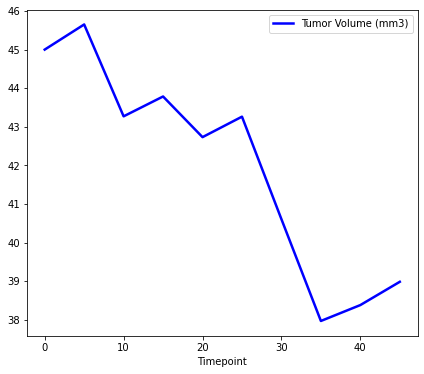

In [48]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomuli
capomulin_df = treatment_regimes_data_extracted[(treatment_regimes_data_extracted['Drug Regimen']== "Capomulin")]
mouseid_capomulin = capomulin_df[capomulin_df['Mouse ID']== 'b128'][['Timepoint','Tumor Volume (mm3)']].set_index('Timepoint')

mouseid_capomulin.plot(figsize=(7,6), linewidth=2.5, color='blue')
plt.title(mouse_id + "= Mouse ID treatment by Capomulin over timepoints")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout()

In [49]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen
capomulin_treatment_regimes = treatment_regimes[treatment_regimes['Drug Regimen']== "Capomulin"]
capomulin_treatment_regimes.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [50]:
average_tumor = capomulin_treatment_regimes.groupby(["Mouse ID","Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()
average_tumor.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


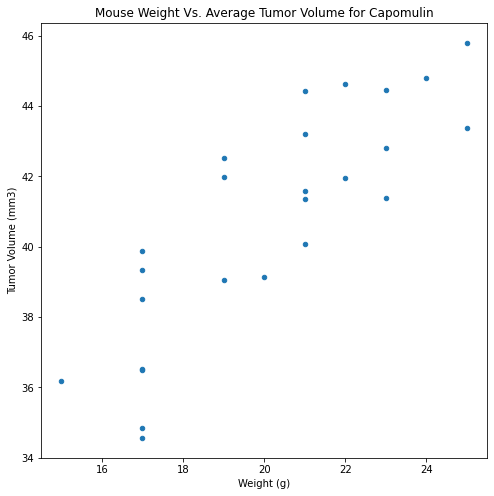

In [51]:
average_tumor.plot(kind ='scatter', x = "Weight (g)",
                   y = "Tumor Volume (mm3)", 
                   figsize=(8,8),
                  title = "Mouse Weight Vs. Average Tumor Volume for Capomulin")

## Correlation and Regression

In [52]:
avg_tumor = average_tumor['Tumor Volume (mm3)']
avg_tumor.head(3)

0    41.963636
1    40.083699
2    36.505973
Name: Tumor Volume (mm3), dtype: float64

In [53]:
mouse_weight = average_tumor['Weight (g)']
mouse_weight.head(3)

0    22
1    21
2    17
Name: Weight (g), dtype: int64

In [54]:
correlation = stats.pearsonr(mouse_weight,avg_tumor)
print(f"The correlation btwn mouse weight and ave tumor Vol for Capomulin treatment {round(correlation[0],2)}")

The correlation btwn mouse weight and ave tumor Vol for Capomulin treatment 0.84


Text(0.5, 1.0, 'Mouse Weight vs Tumor Volume(mm3) drug Capomulin')

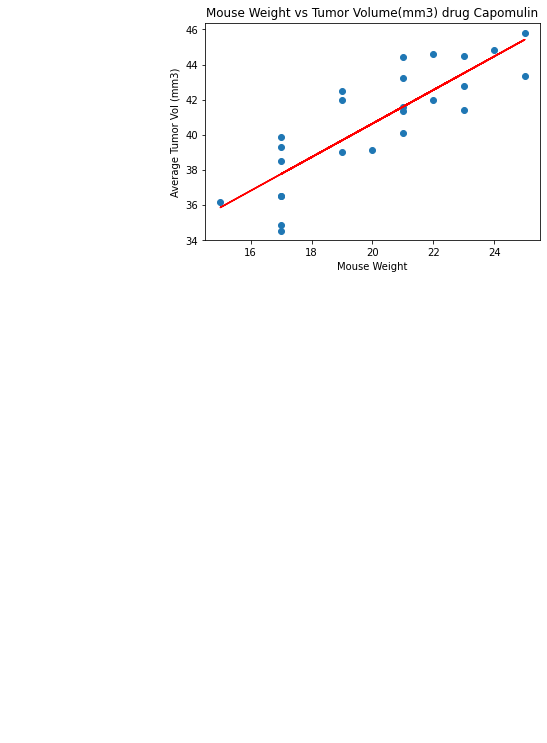

In [55]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_vals = mouse_weight
y_vals = avg_tumor
(slope,intercept,rvalue,pvalue, stderr) = stats.linregress(x_vals, y_vals)
regress_values = x_vals * slope + intercept
linear_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_vals, y_vals)
plt.plot(x_vals, regress_values, "r-")
plt.annotate(linear_equation, (8,6), fontsize=15, color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Vol (mm3)')
plt.title("Mouse Weight vs Tumor Volume(mm3) drug Capomulin")

#plt.show()


# Observations and Insights